In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
filename = "data/anagraficapazientiattivi.csv"

In [9]:
df = pd.read_csv(filename, header=0, index_col=0)

In [37]:
df["age"] = 2021 - df["annonascita"]
df.loc[df["annodecesso"] > 0, "age"] = df["annodecesso"] - df["annonascita"]
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 50, 60, 70, 80, 90, 100, 120],
    labels=["0-50", "51-60", "61-70", "71-80", "81-90", "91-100", "101-120"],
)

age_group
0-50        7416
51-60      21883
61-70      49352
71-80      76163
81-90      68854
91-100     24260
101-120     2058
Name: count, dtype: int64


<Axes: title={'center': 'Age group of patients'}, xlabel='age_group'>

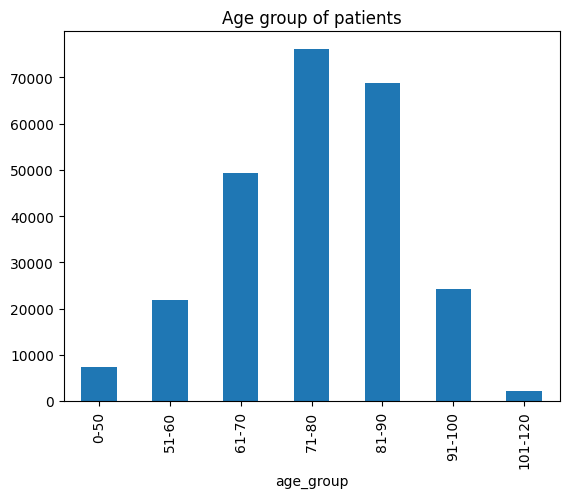

In [38]:
# plot number of patients by age group calculating the age by subtracting the year of birth from the current year or if present the year of death
print(df["age_group"].value_counts().sort_index())
df["age_group"].value_counts().sort_index().plot(
    kind="bar", title="Age group of patients"
)

<Axes: title={'center': 'Age group of patients by sex'}, xlabel='age_group'>

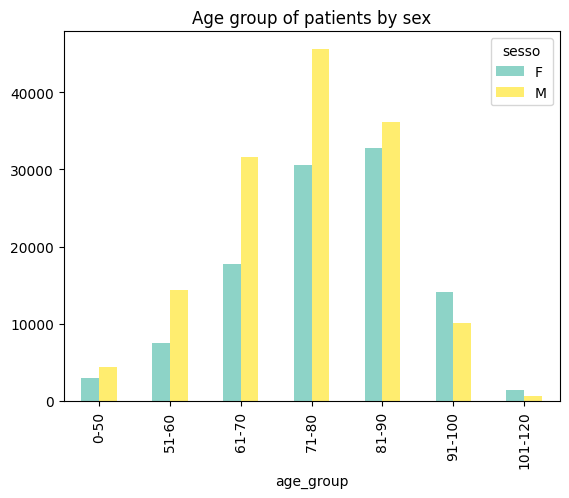

In [39]:
# plot number of patients by age group and sex with a legend
df.groupby(["age_group", "sesso"])["sesso"].count().unstack().plot(
    kind="bar",
    title="Age group of patients by sex",
    colormap="Set3",
)

<Axes: title={'center': 'Percentage of patients by idcentro'}, ylabel='count'>

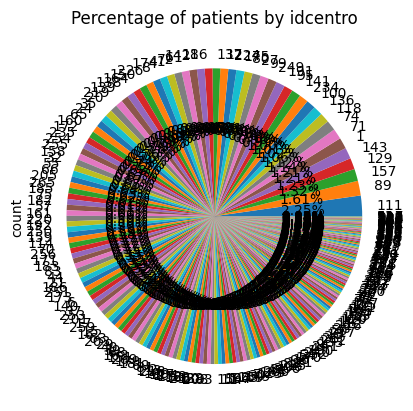

In [45]:
# plot percentage of patient by idcentro with labels that follow the pie slices
df["idcentro"].value_counts().plot(
    kind="pie", title="Percentage of patients by idcentro", autopct="%.2f%%"
)

In [48]:
# plot number of patient by idcentro
df["idcentro"].value_counts().plot(
    kind="bar",
    title="Number of patients by idcentro",
    colormap="Set3",
    figsize=(20, 10),
)